### LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv(r"C:\Users\PC\Downloads\archive (2).zip")

In [13]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [16]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [17]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
df.drop('User ID', axis=1, inplace= True)

In [20]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

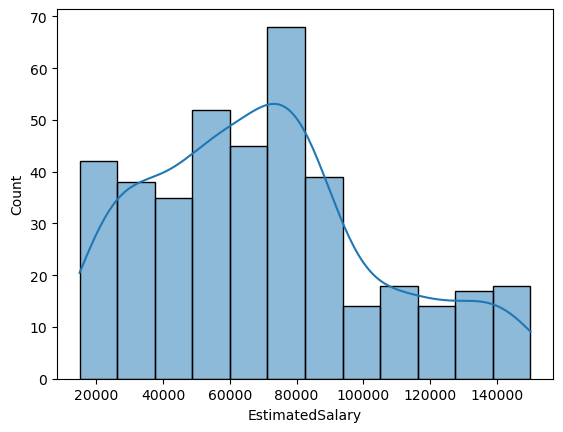

In [22]:
sns.histplot(x=df['EstimatedSalary'], kde = True)

<Axes: xlabel='EstimatedSalary'>

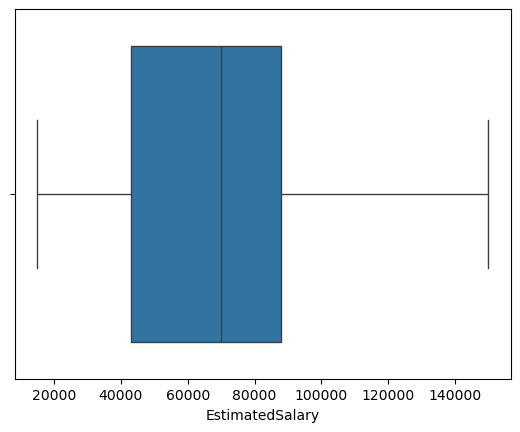

In [23]:
sns.boxplot(x=df['EstimatedSalary'])

There are no outliers

In [26]:
df["Gender"]=pd.get_dummies(df["Gender"],drop_first=True)
df['Gender']

0       True
1       True
2      False
3      False
4       True
       ...  
395    False
396     True
397    False
398     True
399    False
Name: Gender, Length: 400, dtype: bool

Male = True

In [27]:
x=df.iloc[:,:-1]
x

,Gender,Age,EstimatedSalary
0,True,19,19000
1,True,35,20000
2,False,26,43000
3,False,27,57000
4,True,19,76000
...,...,...,...
395,False,46,41000
396,True,51,23000
397,False,50,20000
398,True,36,33000


In [29]:
y=df.Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [32]:
y_test

132    0
390    1
310    0
3      0
248    0
      ..
361    1
197    0
23     1
54     0
58     0
Name: Purchased, Length: 80, dtype: int64

In [35]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_predict=LR.predict(x_test)

In [37]:
y_predict

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score


In [39]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[54  2]
 [10 14]]


In [40]:
recall=recall_score(y_test,y_predict,average='weighted')
recall

0.85

In [41]:
precision=precision_score(y_test,y_predict,average='weighted')
precision

0.853125

In [42]:
f1score=f1_score(y_test,y_predict,average='weighted')
f1score

0.8399999999999999

In [43]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        56
           1       0.88      0.58      0.70        24

    accuracy                           0.85        80
   macro avg       0.86      0.77      0.80        80
weighted avg       0.85      0.85      0.84        80

